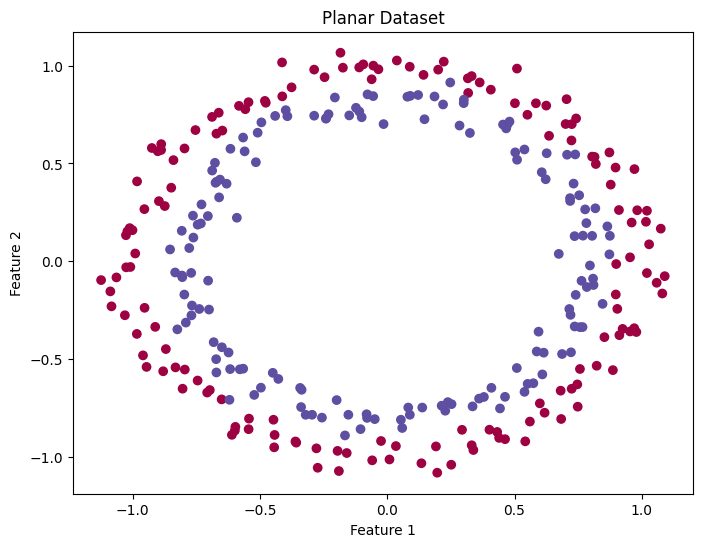


Training Neural Network...
Cost after iteration 0: 0.6931467367118925
Cost after iteration 1000: 0.6931098804991638
Cost after iteration 2000: 0.6930957331160549
Cost after iteration 3000: 0.6616673169764926
Cost after iteration 4000: 0.4705671714420777
Cost after iteration 5000: 0.36729041049780775
Cost after iteration 6000: 1.0723641909561654
Cost after iteration 7000: 0.3533802292696444
Cost after iteration 8000: 0.873177218040403
Cost after iteration 9000: 0.3438977940040127


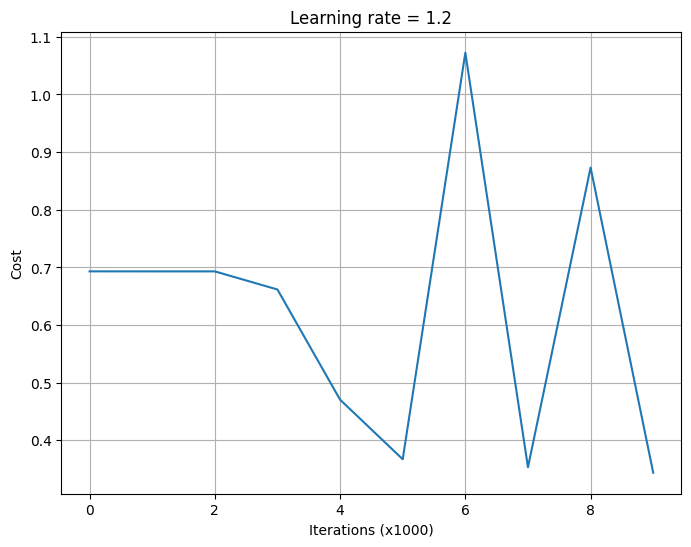

C:\Users\Rohit\AppData\Local\Temp\ipykernel_13852\622328646.py:117: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T)) / Y.size * 100)



Model Accuracy: 86.67%


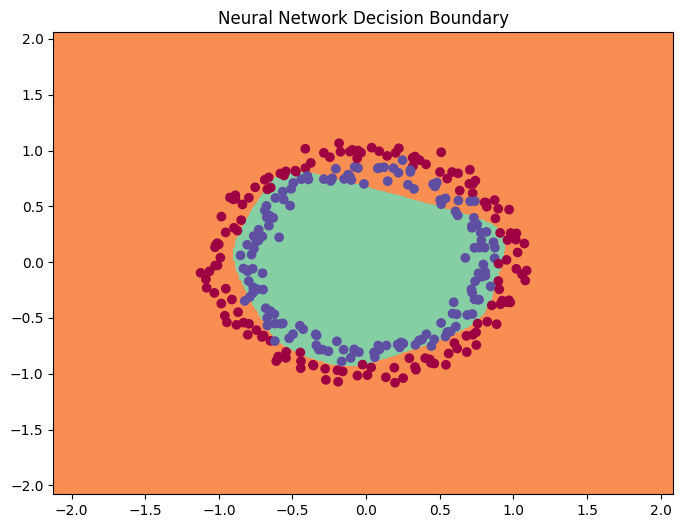


Neural Network Architecture:
- Input Layer: 2 units
- Hidden Layer: 4 units (tanh activation)
- Output Layer: 1 unit (sigmoid activation)

Training Parameters:
- Learning Rate: 1.2
- Iterations: 10000
- Final Accuracy: 86.67%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.datasets import make_circles

# Generate dataset
np.random.seed(1)
X, Y = sklearn.datasets.make_circles(n_samples=300, noise=0.05)
X = X.T
Y = Y.reshape(1, Y.shape[0])

# Plot initial data
plt.figure(figsize=(8, 6))
plt.scatter(X[0, :], X[1, :], c=Y.squeeze(), cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Planar Dataset')
plt.show()

# Functions
def layer_sizes(X, Y, n_h):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def forward_propagation(X, parameters):
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    return A2, {"A1": A1, "A2": A2}

def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))
    return cost

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W2 = parameters["W2"]
    A1, A2 = cache["A1"], cache["A2"]
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def update_parameters(parameters, grads, learning_rate):
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]
    return parameters

def neural_network_model(X, Y, n_h, num_iterations=10000, learning_rate=1.2, print_cost=False):
    np.random.seed(3)
    n_x, _, n_y = layer_sizes(X, Y, n_h)
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []
    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
            costs.append(cost)
    return parameters, costs

def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    return A2 > 0.5

def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()].T
    Z = model(grid_points)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=Y.squeeze(), cmap=plt.cm.Spectral)
    plt.title("Neural Network Decision Boundary")
    plt.show()

# Training
print("\nTraining Neural Network...")
parameters, costs = neural_network_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)

# Cost plot
plt.figure(figsize=(8, 6))
plt.plot(np.squeeze(costs))
plt.ylabel('Cost')
plt.xlabel('Iterations (x1000)')
plt.title("Learning rate = 1.2")
plt.grid(True)
plt.show()

# Predictions
predictions = predict(parameters, X)
accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T)) / Y.size * 100)
print('\nModel Accuracy:', f"{accuracy:.2f}%")

# Decision Boundary
plot_decision_boundary(lambda x: predict(parameters, x), X, Y)

# Network Summary
print("\nNeural Network Architecture:")
print(f"- Input Layer: {X.shape[0]} units")
print(f"- Hidden Layer: 4 units (tanh activation)")
print(f"- Output Layer: 1 unit (sigmoid activation)")
print(f"\nTraining Parameters:")
print(f"- Learning Rate: 1.2")
print(f"- Iterations: 10000")
print(f"- Final Accuracy: {accuracy:.2f}%")
